In [20]:
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy import stats
from numpy.linalg import norm
from matplotlib.pyplot import figure
import random
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df20 = pd.read_csv(url2020)
df20.info()
df21 = pd.read_csv(url2021)
df21.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

In [21]:
df20

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,6.0,11.0,4.0,8.0,-2.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167652,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-27,-93.0,NaN,NaN,NaN,-59.0,21.0
167653,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-28,-43.0,35.0,NaN,-33.0,-30.0,11.0
167654,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-29,-46.0,36.0,NaN,-34.0,-29.0,12.0
167655,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-30,-48.0,17.0,NaN,-27.0,-26.0,11.0


In [22]:
df21

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-01,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-02,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-03,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-04,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-05,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158425,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-01,-12.0,101.0,NaN,-17.0,-15.0,3.0
158426,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-02,-14.0,65.0,NaN,-9.0,-17.0,1.0
158427,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-03,-20.0,NaN,NaN,-19.0,-24.0,2.0
158428,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,NaN,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-04,-8.0,111.0,NaN,-4.0,-15.0,1.0


In [23]:
#Soru 1 Cevap (df20 için)
df20New=df20.dropna(axis=1,how='all')
df20New

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
1,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0
2,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0
3,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,6.0,11.0,4.0,8.0,-2.0
4,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167652,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-27,-93.0,NaN,NaN,NaN,-59.0,21.0
167653,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-28,-43.0,35.0,NaN,-33.0,-30.0,11.0
167654,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-29,-46.0,36.0,NaN,-34.0,-29.0,12.0
167655,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2020-12-30,-48.0,17.0,NaN,-27.0,-26.0,11.0


In [24]:
#Soru 1 Cevap (df21 için)
df21New=df21.dropna(axis=1,how='all')
df21New

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-01,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-02,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-03,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-04,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-01-05,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158425,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-01,-12.0,101.0,NaN,-17.0,-15.0,3.0
158426,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-02,-14.0,65.0,NaN,-9.0,-17.0,1.0
158427,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-03,-20.0,NaN,NaN,-19.0,-24.0,2.0
158428,TR,Turkey,Zonguldak,Zonguldak Merkez,NaN,ChIJ5RJc34yHnEAR6s60uOmblJc,2021-10-04,-8.0,111.0,NaN,-4.0,-15.0,1.0


In [25]:
#Soru 2 Cevap (df20 için)
# mahalanobis için baktığım site: https://www.statology.org/mahalanobis-distance-python/

monthGroup20=df20New.groupby(pd.DatetimeIndex(df20New['date']).month).mean()
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

monthGroup20 ['mahalanobis'] = mahalanobis(x=monthGroup20, data=monthGroup20[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']])
monthGroup20


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis
date,,,,,,,
2,2.028130,3.238759,4.509374,-6.643751,9.353484,-0.698443,6.799677
3,-21.700010,-4.395083,-6.153226,-22.896115,-12.652553,6.332819,2.515010
4,-63.148836,-26.497847,-42.117354,-64.418867,-47.539997,20.742720,8.602830
5,-55.673896,-15.239506,-28.837900,-58.020520,-41.539711,17.455508,8.229767
6,-18.156210,12.410230,32.502002,-17.117761,-10.425022,4.339668,7.663963
7,-6.876458,15.260359,55.750799,-1.882360,-10.858957,-0.082189,3.050788
8,-9.014545,9.800086,60.977582,1.375155,-16.412747,-0.669343,6.643364
9,-13.071653,10.092360,38.977984,-11.851192,-11.053215,2.389219,1.514244
10,-13.590351,19.569650,30.077698,-10.521094,-8.295500,3.886670,5.844341


In [26]:
#Soru 2 Cevap (df21 için)
monthGroup21=df21New.groupby(pd.DatetimeIndex(df21New['date']).month).mean()
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

monthGroup21 ['mahalanobis'] = mahalanobis(x=monthGroup21, data=monthGroup21[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']])
monthGroup21


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis
date,,,,,,,
1,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489,6.529720
2,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199,5.917862
3,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278,2.885326
4,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254,6.946990
5,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152,6.527793
6,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459,5.306735
7,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990,6.314734
8,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539,5.860010
9,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904,3.008164


In [27]:
#Soru 3 Cevap (Euclid)

x=[]
columnList = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"]
for j in range(2,11):
    for i in range(0,6):
        x.append( norm(monthGroup20[columnList[i]][j] - monthGroup21[columnList[i]][j]))
       
x

[43.207825818808956,
 7.592034245398164,
 27.297287094425233,
 24.381626220786572,
 35.26489176923577,
 10.476641731895878,
 3.1502127574245193,
 29.115696954058627,
 1.8658053354168986,
 2.4277455372172483,
 1.2389558785279942,
 0.04445848339650649,
 27.646830241643677,
 47.97642364746609,
 28.25356438655215,
 36.80701474441706,
 23.747178236130694,
 9.694466892201735,
 14.371224699442166,
 28.86948706130481,
 16.87083840633429,
 26.237040901859228,
 7.907700788249528,
 5.060356685804187,
 20.007944299127626,
 35.57008532049699,
 7.423510509135063,
 25.54882440219258,
 0.012564074024165706,
 4.028209522246186,
 33.84326252960485,
 46.449366884219195,
 31.232843856080272,
 42.30033220309397,
 6.55420048588525,
 2.745800753540859,
 35.72344663820422,
 49.19005584791403,
 12.953659826079992,
 33.52282876292102,
 8.159828217556855,
 1.437196293268553,
 37.98492588996848,
 52.58494215228433,
 13.173028510227013,
 37.60982549714655,
 10.3044286302139,
 4.045123118575571,
 36.5055323607675,


In [28]:
#Soru 3 Cevap (Minkowski)
x=[]
columnList = ["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"]
for j in range(2,11):
    for i in range(0,6):
        x.append( distance.minkowski(monthGroup20[columnList[i]][j], monthGroup21[columnList[i]][j],1))
       
x 



[43.207825818808956,
 7.592034245398164,
 27.297287094425233,
 24.381626220786572,
 35.26489176923577,
 10.476641731895878,
 3.1502127574245193,
 29.115696954058627,
 1.8658053354168986,
 2.4277455372172483,
 1.2389558785279942,
 0.04445848339650649,
 27.646830241643677,
 47.97642364746609,
 28.25356438655215,
 36.80701474441706,
 23.747178236130694,
 9.694466892201735,
 14.371224699442166,
 28.86948706130481,
 16.87083840633429,
 26.237040901859228,
 7.907700788249528,
 5.060356685804187,
 20.007944299127626,
 35.57008532049699,
 7.423510509135063,
 25.54882440219258,
 0.012564074024165706,
 4.028209522246186,
 33.84326252960485,
 46.449366884219195,
 31.232843856080272,
 42.30033220309397,
 6.55420048588525,
 2.745800753540859,
 35.72344663820422,
 49.19005584791403,
 12.953659826079992,
 33.52282876292102,
 8.159828217556855,
 1.437196293268553,
 37.98492588996848,
 52.58494215228433,
 13.173028510227013,
 37.60982549714655,
 10.3044286302139,
 4.045123118575571,
 36.5055323607675,


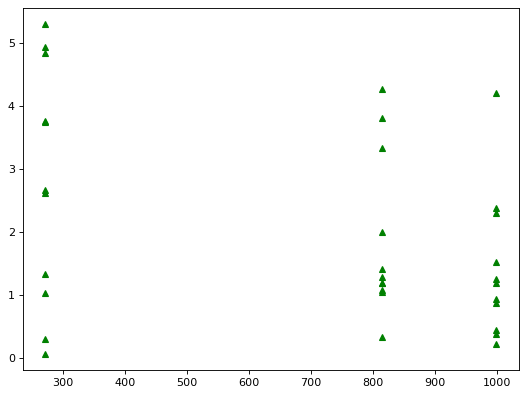

In [101]:
#Soru 4 Cevap
monthGroup20=df20New.groupby(pd.DatetimeIndex(df20New['date']).month).mean()
x=[]
y=[]
t=[]
n= random.randint(50,1000)
r= random.randint(50,1000)
z= random.randint(50,1000)
sampleDf1=df20.sample(n)
sampleDf2=df20.sample(r)
sampleDf3=df20.sample(z)
monthSample1=sampleDf1.groupby(pd.DatetimeIndex(sampleDf1['date']).month).mean()
monthSample2=sampleDf2.groupby(pd.DatetimeIndex(sampleDf2['date']).month).mean()
monthSample3=sampleDf3.groupby(pd.DatetimeIndex(sampleDf3['date']).month).mean()

a=[]
b=[]
c=[]
for j in range(2,13):
        x.append(n)
        y.append(r)
        t.append(z)
        a.append(abs(monthGroup20.loc[j].mean()-monthSample1.loc[j].mean()))
        b.append(abs(monthGroup20.loc[j].mean()-monthSample2.loc[j].mean()))
        c.append(abs(monthGroup20.loc[j].mean()-monthSample3.loc[j].mean()))
figure(figsize=(8, 6), dpi=80)
plt.plot(x,a,"g^")
plt.plot(y,b,"g^")
plt.plot(t,c,"g^")


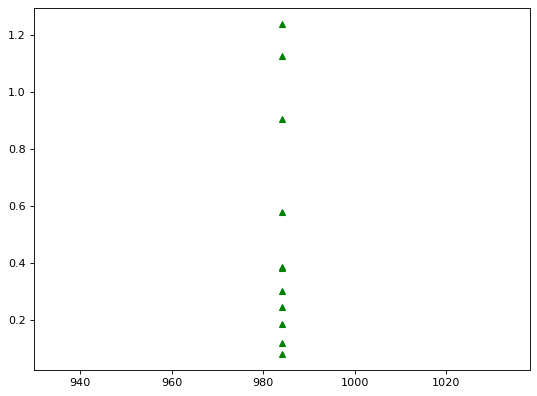

In [106]:
#Soru 5 Cevap
n= random.randint(50,1000)
monthGroup20=df20.groupby(pd.DatetimeIndex(df20['date']).month)
sampleDf1=monthGroup20.apply(lambda s: s.sample(n))
df20Groupby=df20New.groupby(pd.DatetimeIndex(df20New['date']).month).mean()
x=[]
y=[]
for j in range(2,13):
    x.append(n)
    y.append(abs(df20Groupby.loc[j].mean()-sampleDf1.loc[j].mean().mean()))
figure(figsize=(8, 6), dpi=80)
plt.plot(x,y,"g^")